In [1]:
import pandas as pd
import geopandas as gpd
import xarray as xr
import rioxarray
import numpy as np
import rasterio 
import os
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import mapping

In [2]:
os.chdir('/home/h99g576/Zambia_SPEI/')

In [3]:
# load Zambia shapefile
zambia = 'Data/zm.shp'
# read shapefile into geodataframe
gdf = gpd.read_file(zambia)

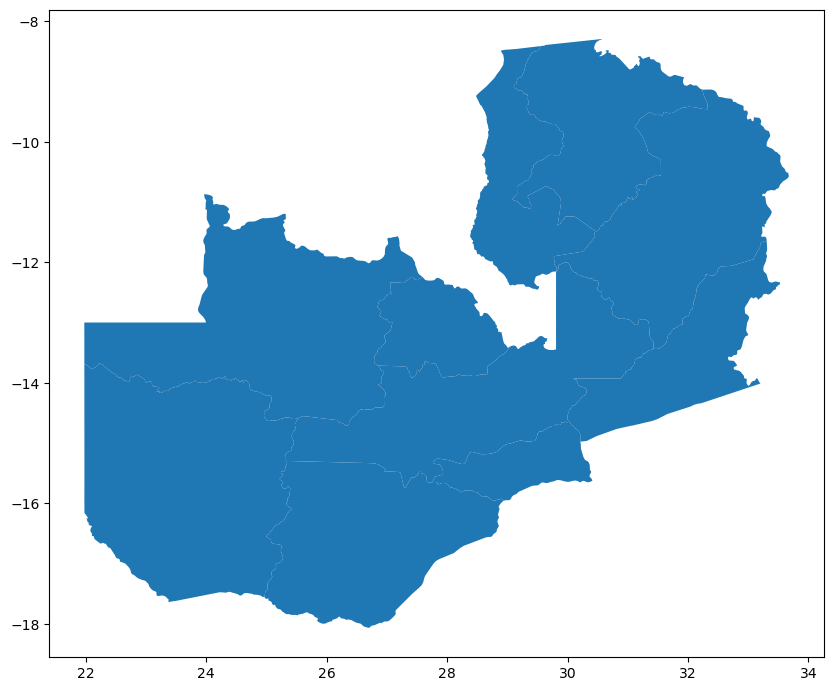

In [4]:
# plot data
gdf.plot(figsize=(10, 10))
plt.show()

In [8]:
print(gdf.crs)

EPSG:4326


In [5]:
# import ESSD Copernicus SPEI data
spei_file = 'Data/spei48.nc'
spei_data = xr.open_dataset(spei_file)

In [6]:
# set shapefile CRS
gdf.crs = 'EPSG:4326'

In [10]:
print(spei_data)

<xarray.Dataset> Size: 29GB
Dimensions:  (lon: 7200, lat: 2000, time: 504)
Coordinates:
  * lon      (lon) float64 58kB -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
  * lat      (lat) float64 16kB -49.97 -49.92 -49.88 ... 49.87 49.92 49.97
  * time     (time) datetime64[ns] 4kB 1981-01-01 1981-02-01 ... 2022-12-16
Data variables:
    spei     (time, lat, lon) float32 29GB ...
Attributes: (12/14)
    Title:        Global 48-months SPEI, z-values, 0.05 degree
    Version:      2.6
    Id:           /mainfs/evoflood/SPEI/SPEI/CHIRPS_GLEAM/spei48.nc
    Summary:      Global dataset of the Standardized\n\t  Precipitation-Evapo...
    Keywords:     drought, climatology, SPEI, Standardized\n\t  Precipitation...
    Institution:  Consejo Superior de Investigaciones\n\t          Científica...
    ...           ...
    Software:     Created in R using the SPEI package\n\t          (https://c...
    Call:         spei.nc(sca=i, inPre=/mainfs/evoflood/SPEI/Prcp/Prcp_chirps...
    Date:         Thu M

In [7]:
# ensure 'time' variable is in right format
spei_data['time'] = pd.to_datetime(spei_data['time'].values)

In [8]:
# filter SPEI data to get only data from 2000-2020
spei_data_filtered = spei_data.sel(time=slice('2000-01-01', '2020-12-31'))

In [9]:
# set spatial dimensions
spei_data_filtered.rio.set_spatial_dims(x_dim = 'lon', y_dim = 'lat', inplace = True)

<xarray.Dataset> Size: 15GB
Dimensions:  (lon: 7200, lat: 2000, time: 252)
Coordinates:
  * lon      (lon) float64 58kB -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
  * lat      (lat) float64 16kB -49.97 -49.92 -49.88 ... 49.87 49.92 49.97
  * time     (time) datetime64[ns] 2kB 2000-01-01 2000-02-01 ... 2020-12-01
Data variables:
    spei     (time, lat, lon) float32 15GB ...
Attributes: (12/14)
    Title:        Global 48-months SPEI, z-values, 0.05 degree
    Version:      2.6
    Id:           /mainfs/evoflood/SPEI/SPEI/CHIRPS_GLEAM/spei48.nc
    Summary:      Global dataset of the Standardized\n\t  Precipitation-Evapo...
    Keywords:     drought, climatology, SPEI, Standardized\n\t  Precipitation...
    Institution:  Consejo Superior de Investigaciones\n\t          Científica...
    ...           ...
    Software:     Created in R using the SPEI package\n\t          (https://c...
    Call:         spei.nc(sca=i, inPre=/mainfs/evoflood/SPEI/Prcp/Prcp_chirps...
    Date:         Thu May  4 23:09:13 2023
    Reference:    Beguería S., Vicente-Serrano S., Reig F., Latorre B. (2014)...
    Reference2:   Vicente-Serrano S.M., Beguería S., López-Moreno J.I. (2010)...
    Reference3:   Beguería S., Vicente-Serrano S., Angulo-Martínez M. (2010) ...

In [10]:
# define CRS 
spei_data_filtered.rio.write_crs('EPSG:4326', inplace = True)

<xarray.Dataset> Size: 15GB
Dimensions:      (lon: 7200, lat: 2000, time: 252)
Coordinates:
  * lon          (lon) float64 58kB -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
  * lat          (lat) float64 16kB -49.97 -49.92 -49.88 ... 49.87 49.92 49.97
  * time         (time) datetime64[ns] 2kB 2000-01-01 2000-02-01 ... 2020-12-01
    spatial_ref  int64 8B 0
Data variables:
    spei         (time, lat, lon) float32 15GB ...
Attributes: (12/14)
    Title:        Global 48-months SPEI, z-values, 0.05 degree
    Version:      2.6
    Id:           /mainfs/evoflood/SPEI/SPEI/CHIRPS_GLEAM/spei48.nc
    Summary:      Global dataset of the Standardized\n\t  Precipitation-Evapo...
    Keywords:     drought, climatology, SPEI, Standardized\n\t  Precipitation...
    Institution:  Consejo Superior de Investigaciones\n\t          Científica...
    ...           ...
    Software:     Created in R using the SPEI package\n\t          (https://c...
    Call:         spei.nc(sca=i, inPre=/mainfs/evoflood/SPEI/Prcp/Prcp_chirps...
    Date:         Thu May  4 23:09:13 2023
    Reference:    Beguería S., Vicente-Serrano S., Reig F., Latorre B. (2014)...
    Reference2:   Vicente-Serrano S.M., Beguería S., López-Moreno J.I. (2010)...
    Reference3:   Beguería S., Vicente-Serrano S., Angulo-Martínez M. (2010) ...

In [11]:
# convert 'time' coordinate to datetime
spei_data_filtered['time'] = pd.to_datetime(spei_data_filtered['time'].values)

In [21]:
print(spei_data_filtered.coords['time'])

<xarray.DataArray 'time' (time: 252)> Size: 2kB
array(['2000-01-01T00:00:00.000000000', '2000-02-01T00:00:00.000000000',
       '2000-03-01T00:00:00.000000000', ..., '2020-10-01T00:00:00.000000000',
       '2020-11-01T00:00:00.000000000', '2020-12-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time         (time) datetime64[ns] 2kB 2000-01-01 2000-02-01 ... 2020-12-01
    spatial_ref  int64 8B 0


In [12]:
# create variable identifying province names
provinces = gdf['name'].unique()
print(provinces)

['Muchinga' 'Eastern' 'Northern' 'Lusaka' 'Southern' 'Western'
 'North-Western' 'Luapula' 'Copperbelt' 'Central']


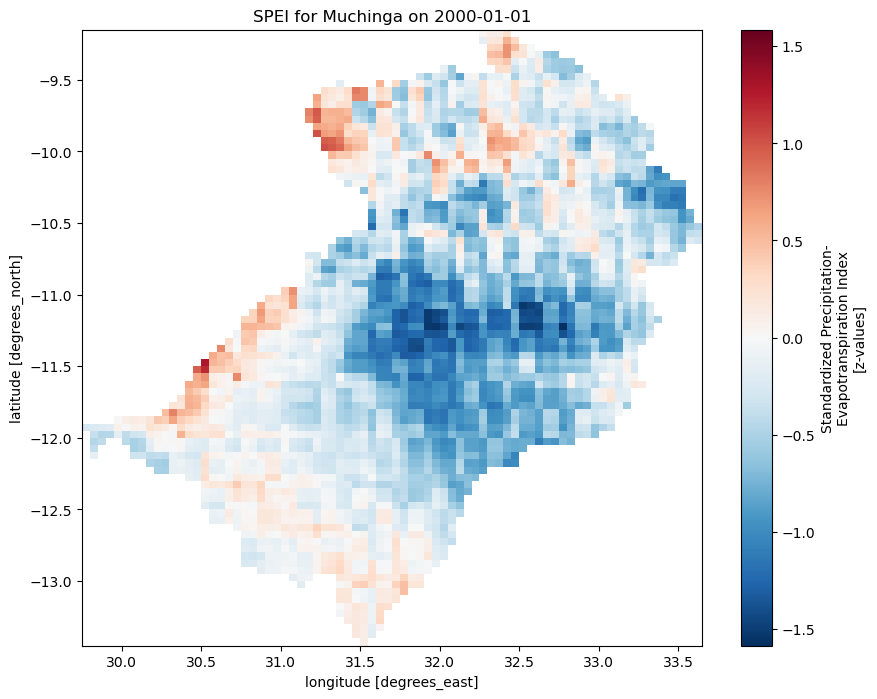

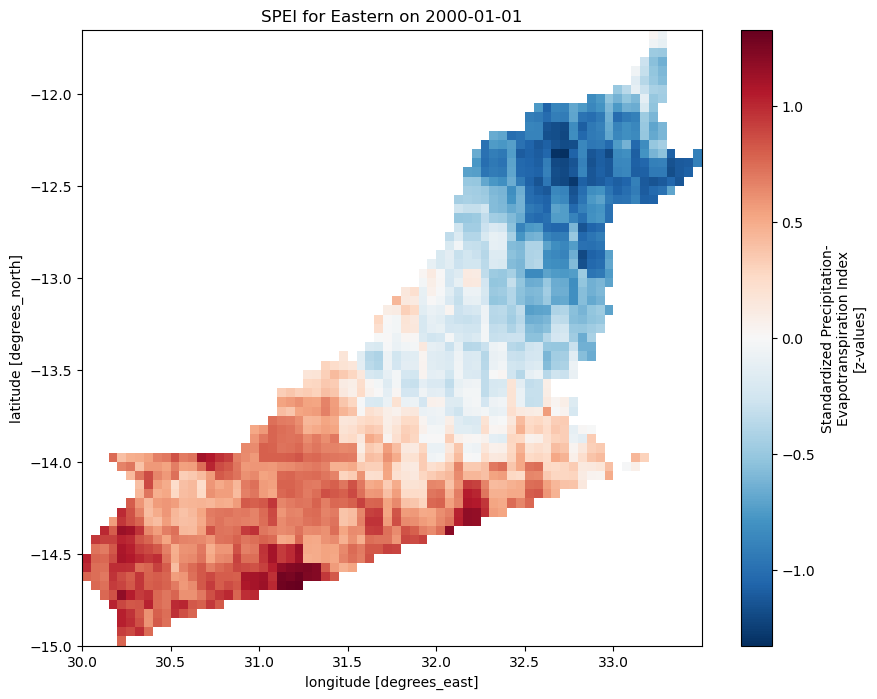

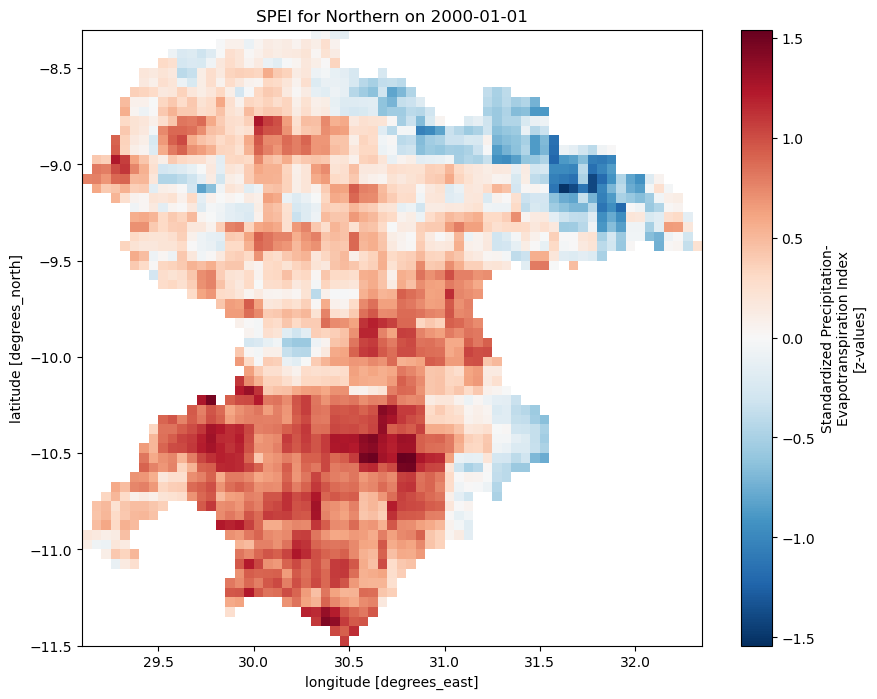

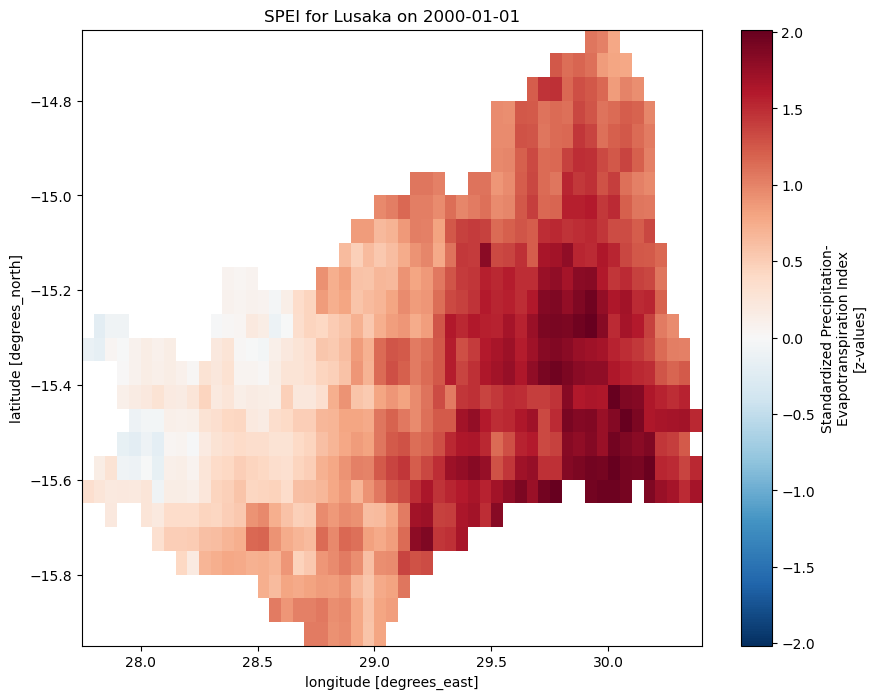

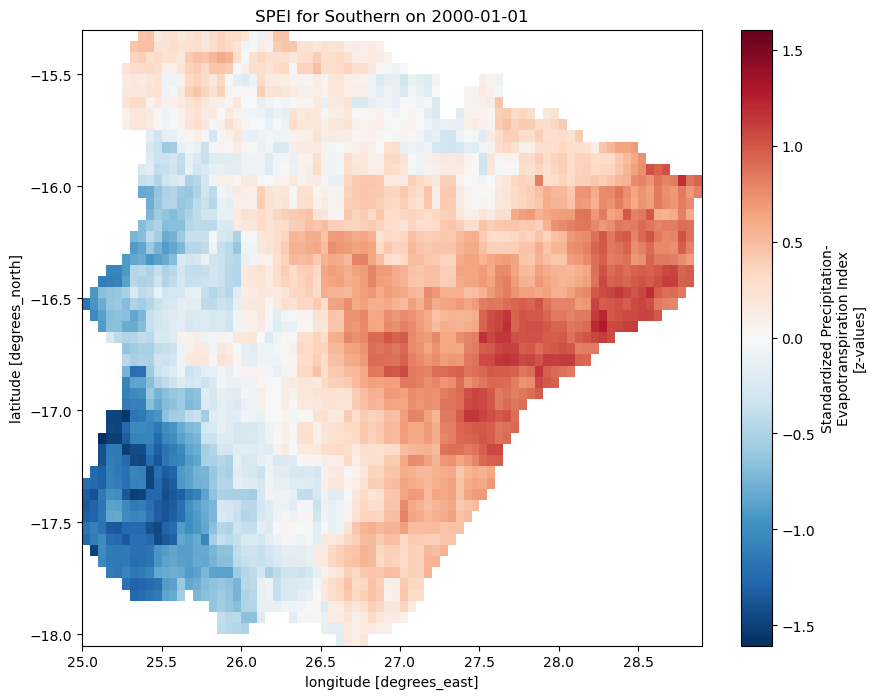

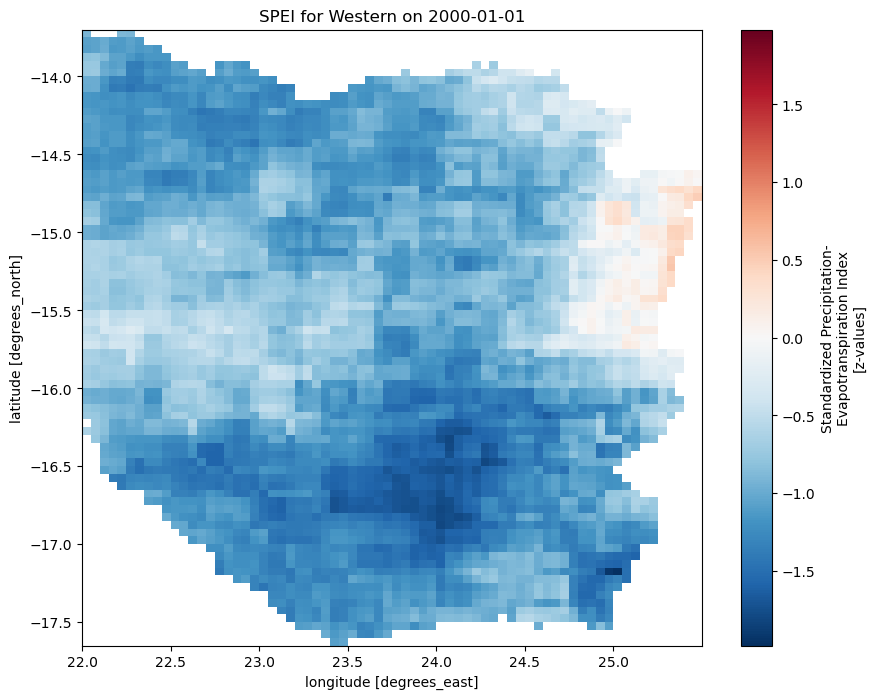

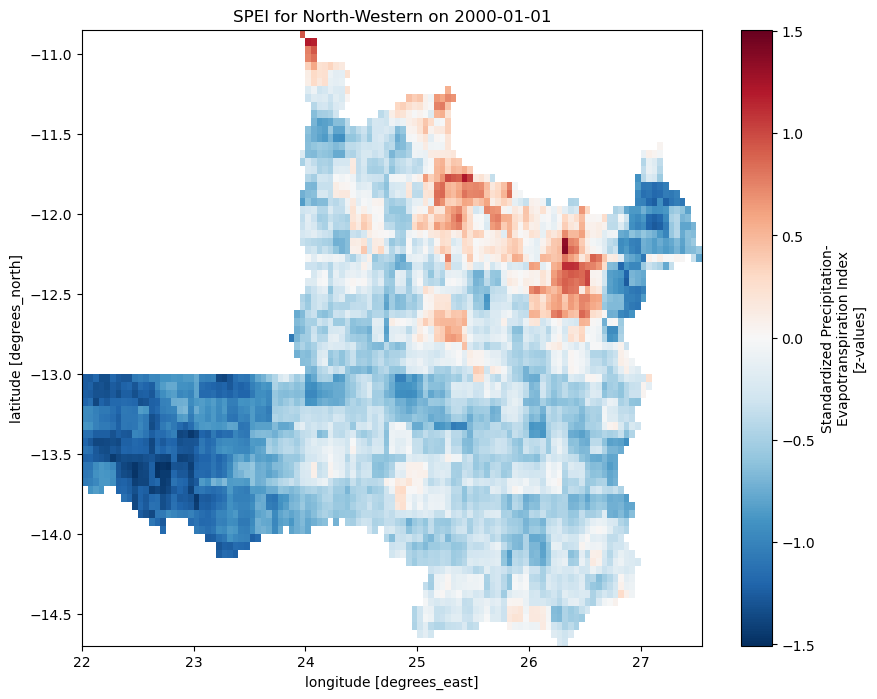

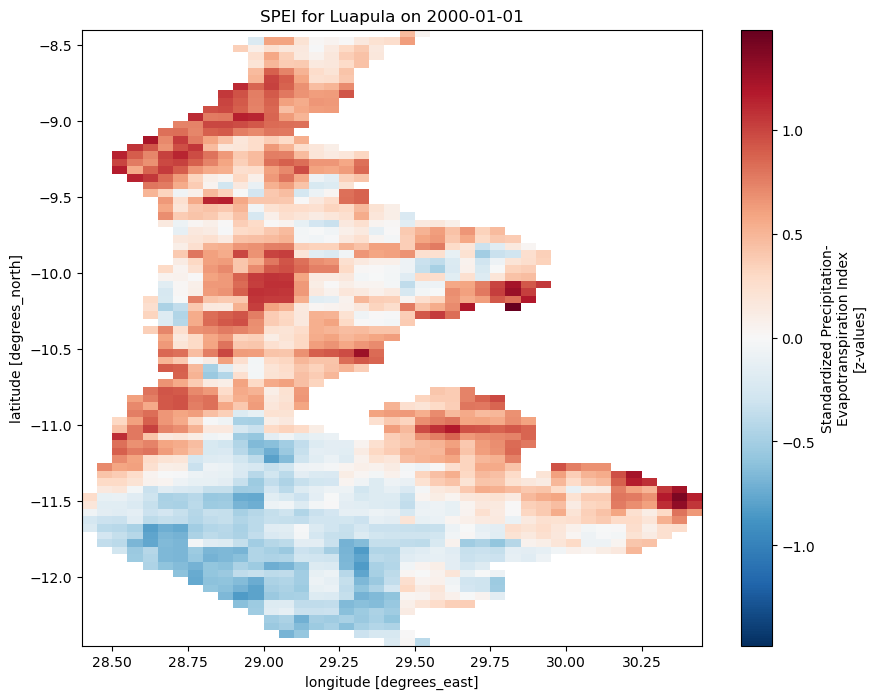

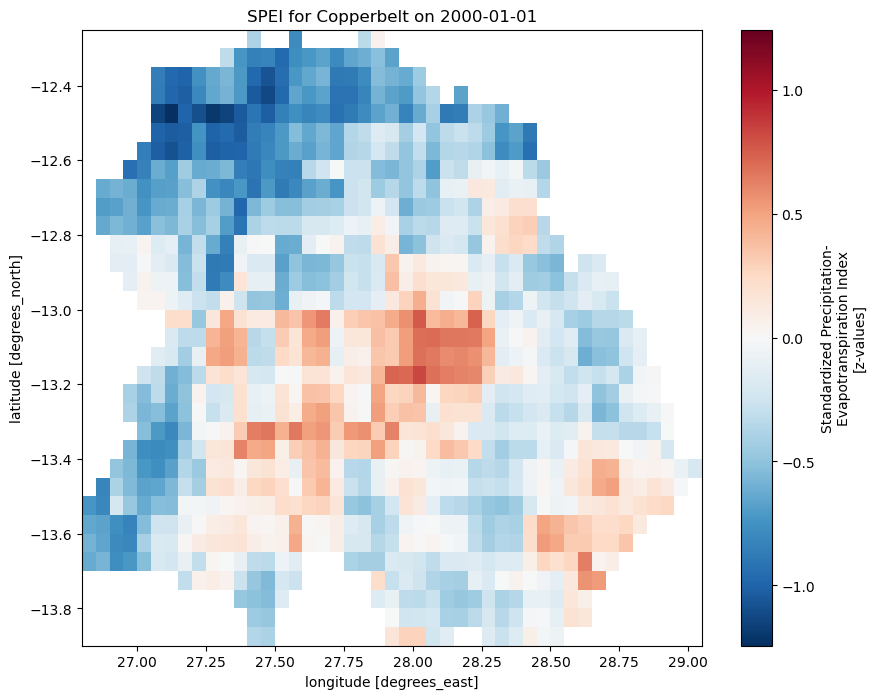

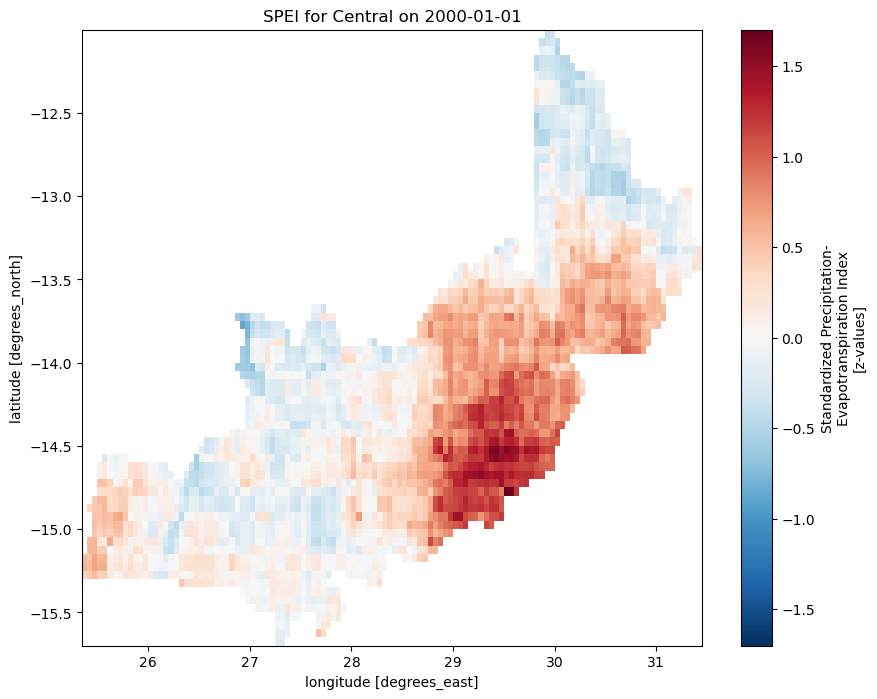

In [13]:
for province in provinces:
    province_geom = gdf[gdf['name'] == province].geometry.iloc[0]
    spei_clipped = spei_data_filtered.rio.clip([mapping(province_geom)], crs=gdf.crs)
    spei_variable = spei_clipped['spei']
    
    # plot first time step
    spei_variable.sel(time='2000-01-01').plot(figsize=(10, 8))
    
    plt.title(f'SPEI for {province} on 2000-01-01')
    plt.show()

# Code graveyard

In [10]:
import glob

In [11]:
from glob import glob

In [12]:
file_list = sorted(glob.glob('*.nc'))

AttributeError: 'function' object has no attribute 'glob'

In [13]:
for file in file_list:
    nc_file = xarray.open_dataset(file)
    clipped_nc = nc_file.rio.clip(gdf.geometry.apply(mapping), gdf.crs, all_touched = True)

NameError: name 'file_list' is not defined

In [14]:
# create zambia shapefile mask
zambia_mask = rasterio.features.geometry_mask(gdf.iloc[0],
                                              out_shape = (len(spei.y), len(spei.x)),
                                              transform = spei.geobox.transform,
                                              invert = True)


NameError: name 'spei' is not defined

In [9]:
spei_raster = spei_data['spei']

In [10]:
spei_raster.rio.write_crs("EPSG:4326", inplace=True)  # Set the CRS for the raster data if not defined

# Step 5: Reproject the GeoDataFrame to the same CRS as the raster (if needed)
gdf = gdf.to_crs(spei_raster.rio.crs)

In [ ]:
# Set spatial dimensions explicitly for rioxarray
spei_raster = spei_raster.rename({'lat': 'y', 'lon': 'x'})

# Now we can clip the raster
clip_geometry = gdf.geometry.apply(mapping)
clipped_spei = spei_raster.rio.clip(clip_geometry, gdf.crs)

# Plot the clipped data
plt.figure(figsize=(10, 10))
clipped_spei.plot()
plt.title('Clipped SPEI Data for Zambia')
plt.show()

In [24]:
# clip SPEI raster to Zambia shapefile
clip_geometry = gdf.geometry.apply(mapping)
clipped_spei = spei_raster.rio.clip(clip_geometry, gdf.crs)

MissingSpatialDimensionError: y dimension not found. 'rio.set_spatial_dims()' or using 'rename()' to change the dimension name to 'y' can address this. Data variable: spei

In [18]:
clipped = raster.clip(gdf.geometry.apply(mapping), gdf.crs)

NameError: name 'raster' is not defined